In [1]:
# ================================================================
# Si Symmetry Function Visualization Script (G2 + G4)
# ================================================================
# This script plots example radial (G2) and angular (G4) symmetry
# functions used in n2p2 neural network training, customized for Si.
#
# === How to Use ===
# - Run this script directly using Python (requires matplotlib + numpy)
# - The resulting plot will be saved as "symfunc_visual_Si.png"
#
# === How to Modify for Other Systems ===
# 1. Adjust radial G2 parameters:
#    - `mu_short` for short-range (recommended: 1.0–2.0 Å)
#    - `mu_long` for long-range (e.g., 2.0–5.5 Å)
#    - `eta_short` and `eta_long` control Gaussian sharpness
#
# 2. Adjust center-mode G2 parameters:
#    - `eta_center_list` should include multiple η values (covering narrow to wide Gaussians)
#
# 3. Adjust angular G4 (Type 3) parameters:
#    - `zeta_narrow` (e.g., [1, 2, 4]) and λ ∈ {–1, +1}
#    - Angular functions are independent of radial cutoff (just for shape visualization)
#
# 4. Adjust angular G4 (Type 9) parameters:
#    - `zeta_wide`, `eta_wide_set`, and λ
#    - These should be chosen to avoid overly sharp peaks (which may cause instability)
#
# 5. Modify `r_cut` to match the cutoff radius used in your dataset (e.g., 6.5 Å for Si)
#

In [2]:
import numpy as np

def generate_rich_symfuncs(element='Si', r_cutoff=6.5):  # Si prefers slightly larger cutoff
    results = []

    def block_comment(title):
        return [
            "#" * 73,
            f"# {title} for elements ['{element}']",
            "#" * 73
        ]

    # === Short-range G2 (shift mode) ===
    n_short = 100
    eta_short = 50.0
    r_lower_s, r_upper_s = 1.0, 2.0
    mu_grid_short = np.linspace(r_lower_s, r_upper_s, n_short)
    results.extend(block_comment("Short-range radial symmetry function set (shift mode)"))
    for mu in mu_grid_short:
        results.append(f"symfunction_short {element}  2 {element}  {eta_short:.3E} {mu:.3E} {r_cutoff:.3E}")

    # === Long-range G2 (shift mode) ===
    n_long = 100
    eta_long = 0.8889
    r_lower_l, r_upper_l = 2.0, 5.5
    mu_grid_long = np.linspace(r_lower_l, r_upper_l, n_long)
    results.append("")
    results.extend(block_comment("Long-range radial symmetry function set (shift mode)"))
    for mu in mu_grid_long:
        results.append(f"symfunction_short {element}  2 {element}  {eta_long:.3E} {mu:.3E} {r_cutoff:.3E}")

    # === G2 (center mode) ===
    eta_center_set = [0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]
    results.append("")
    results.extend(block_comment("Center-mode radial symmetry function set"))
    for eta in eta_center_set:
        results.append(f"symfunction_short {element}  2 {element}  {eta:.3E} 0.000E+00 {r_cutoff:.3E} centre")

    # === Angular G4 narrow (Type 3) ===
    n_angular = 100
    eta_ang = 2.0
    lambdas = [-1, 1]
    zetas_narrow = [1, 2, 4]
    r_grid_ang = np.linspace(2.0, 5.0, n_angular)
    results.append("")
    results.extend(block_comment("Narrow angular symmetry function set (Type 3)"))
    for r in r_grid_ang:
        for lam in lambdas:
            for zeta in zetas_narrow:
                results.append(f"symfunction_short {element}  3 {element}  {element}  {eta_ang:.3E} {lam:+d} {zeta:.1f} {r_cutoff:.3E} {r:.3E}")

    # === Angular G4 wide (Type 9, safer ζ/η combination) ===
    zetas_wide_safe = [8, 12, 16]
    eta_low = 0.5
    eta_high = 1.0
    r_wide_grid = np.linspace(2.0, 6.0, 80)

    results.append("")
    results.extend(block_comment("Wide angular symmetry function set (Type 9, safe for Si)"))
    for r in r_wide_grid:
        for lam in [-1,1]:
            for zeta in zetas_wide_safe:
                eta_list = [eta_high] if zeta >= 12 else [eta_low, eta_high]
                for eta in eta_list:
                    results.append(
                        f"symfunction_short {element}  9 {element}  {element}  {eta:.3E} {lam:+d} {zeta:.1f} {r_cutoff:.3E} {r:.3E}"
                    )

    # === Summary ===
    summary = {
        "n_short": n_short,
        "eta_short": eta_short,
        "mu_grid_short": mu_grid_short,
        "n_long": n_long,
        "eta_long": eta_long,
        "mu_grid_long": mu_grid_long,
        "eta_center_set": eta_center_set,
        "n_ang": n_angular,
        "zetas_narrow": zetas_narrow,
        "zetas_wide": zetas_wide_safe,
        "eta_wide_set": [eta_low, eta_high],
        "lambdas": lambdas,
        "r_grid": r_grid_ang,
        "r_wide_grid": r_wide_grid
    }

    return "\n".join(results), summary

# === Execution and saving ===
if __name__ == "__main__":
    text, summary = generate_rich_symfuncs()

    with open("generated_symfuncs.txt", "w") as f:
        f.write(text)
    print("[✓] Saved to generated_symfuncs.txt")

    print("\n=== Symmetry Function Parameter Summary ===")
    print("G2 (radial, shift mode):")
    print(f"  - Short-range: {summary['n_short']} functions (η={summary['eta_short']}, μ ∈ [{summary['mu_grid_short'][0]:.2f}, {summary['mu_grid_short'][-1]:.2f}])")
    print(f"  - Long-range : {summary['n_long']} functions (η={summary['eta_long']}, μ ∈ [{summary['mu_grid_long'][0]:.2f}, {summary['mu_grid_long'][-1]:.2f}])")

    print("G2 (radial, center mode):")
    print(f"  - Centered   : {len(summary['eta_center_set'])} functions (η values = {summary['eta_center_set']})")

    print("G4 (angular, Type 3 - narrow):")
    total_narrow = summary['n_ang'] * len(summary['lambdas']) * len(summary['zetas_narrow'])
    print(f"  - {total_narrow} functions total")
    print(f"  - ζ values: {summary['zetas_narrow']}, λ values: {summary['lambdas']}, r ∈ [{summary['r_grid'][0]:.2f}, {summary['r_grid'][-1]:.2f}]")

    print("G4 (angular, Type 9 - wide):")
    total_wide = len(summary['r_wide_grid']) * len(summary['lambdas']) * len(summary['zetas_wide']) * 2  # since some have 2 η
    print(f"  - {total_wide} functions total")
    print(f"  - ζ values: {summary['zetas_wide']}, η values: {summary['eta_wide_set']}, λ values: {summary['lambdas']}, r ∈ [{summary['r_wide_grid'][0]:.2f}, {summary['r_wide_grid'][-1]:.2f}]")



[✓] Saved to generated_symfuncs.txt

=== Symmetry Function Parameter Summary ===
G2 (radial, shift mode):
  - Short-range: 100 functions (η=50.0, μ ∈ [1.00, 2.00])
  - Long-range : 100 functions (η=0.8889, μ ∈ [2.00, 5.50])
G2 (radial, center mode):
  - Centered   : 8 functions (η values = [0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0])
G4 (angular, Type 3 - narrow):
  - 600 functions total
  - ζ values: [1, 2, 4], λ values: [-1, 1], r ∈ [2.00, 5.00]
G4 (angular, Type 9 - wide):
  - 960 functions total
  - ζ values: [8, 12, 16], η values: [0.5, 1.0], λ values: [-1, 1], r ∈ [2.00, 6.00]


[✓] Plot saved to: symfunc_visual_si.png


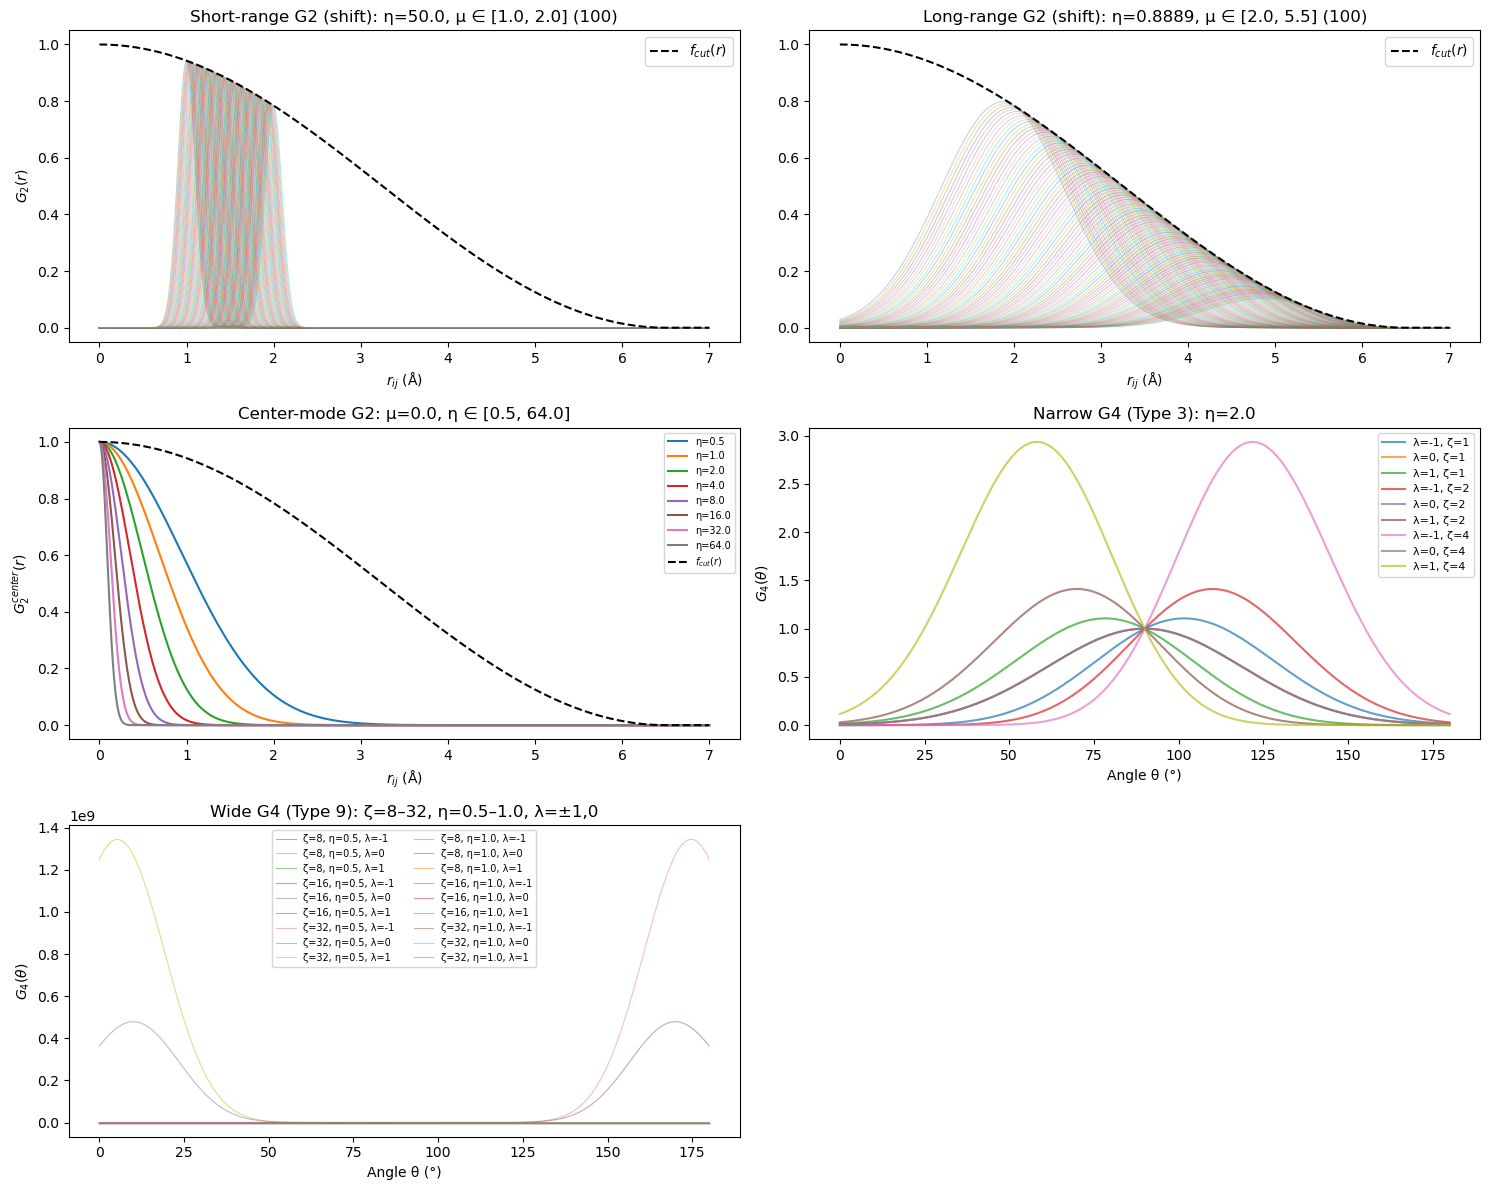

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def cutoff_function(r, r_cut):
    return np.where(r <= r_cut, 0.5 * (np.cos(np.pi * r / r_cut) + 1), 0.0)

def gaussian(r, eta, mu, r_cut):
    return np.exp(-eta * (r - mu)**2) * cutoff_function(r, r_cut)

def angular_response(theta, eta, lam, zeta):
    return (1 + lam * np.cos(theta))**zeta * np.exp(-eta * (theta - np.pi / 2)**2)

def plot_updated_symfuncs_si(output="symfunc_visual_si.png"):
    r = np.linspace(0, 7.0, 1000)
    theta = np.linspace(0, np.pi, 300)
    r_cut = 6.5
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    # === G2 parameters for Si ===
    eta_short, mu_short = 50.0, np.linspace(1.0, 2.0, 100)
    eta_long, mu_long = 0.8889, np.linspace(2.0, 5.5, 100)
    eta_center_list = [0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0]

    # === G4 parameters for Si ===
    zeta_narrow = [1, 2, 4]
    zeta_wide = [8, 16, 32]
    eta_wide_set = [0.5, 1.0]
    lam_list = [-1, 0, 1]

    # === Short-range G2 ===
    ax = axes[0, 0]
    for mu in mu_short:
        ax.plot(r, gaussian(r, eta_short, mu, r_cut), alpha=0.3, linewidth=0.8)
    ax.plot(r, cutoff_function(r, r_cut), 'k--', label="$f_{cut}(r)$")
    ax.set_title("Short-range G2 (shift): η=50.0, μ ∈ [1.0, 2.0] (100)")
    ax.set_xlabel("$r_{ij}$ (Å)")
    ax.set_ylabel("$G_2(r)$")
    ax.legend()

    # === Long-range G2 ===
    ax = axes[0, 1]
    for mu in mu_long:
        ax.plot(r, gaussian(r, eta_long, mu, r_cut), alpha=0.3, linewidth=0.8)
    ax.plot(r, cutoff_function(r, r_cut), 'k--', label="$f_{cut}(r)$")
    ax.set_title("Long-range G2 (shift): η=0.8889, μ ∈ [2.0, 5.5] (100)")
    ax.set_xlabel("$r_{ij}$ (Å)")
    ax.legend()

    # === Center-mode G2 ===
    ax = axes[1, 0]
    mu_centre = 0.0
    for eta in eta_center_list:
        ax.plot(r, gaussian(r, eta, mu_centre, r_cut), label=f"η={eta:.1f}")
    ax.plot(r, cutoff_function(r, r_cut), 'k--', label="$f_{cut}(r)$")
    ax.set_title("Center-mode G2: μ=0.0, η ∈ [0.5, 64.0]")
    ax.set_xlabel("$r_{ij}$ (Å)")
    ax.set_ylabel("$G_2^{center}(r)$")
    ax.legend(fontsize=7)

    # === G4 narrow (type 3) ===
    ax = axes[1, 1]
    for zeta in zeta_narrow:
        for lam in lam_list:
            ax.plot(np.degrees(theta),
                    angular_response(theta, eta=2.0, lam=lam, zeta=zeta),
                    label=f"λ={lam}, ζ={zeta}", alpha=0.7)
    ax.set_title("Narrow G4 (Type 3): η=2.0")
    ax.set_xlabel("Angle θ (°)")
    ax.set_ylabel("$G_4(θ)$")
    ax.legend(fontsize=8)

    # === G4 wide (type 9) ===
    ax = axes[2, 0]
    for eta in eta_wide_set:
        for zeta in zeta_wide:
            for lam in lam_list:
                ax.plot(np.degrees(theta),
                        angular_response(theta, eta=eta, lam=lam, zeta=zeta),
                        label=f"ζ={zeta}, η={eta}, λ={lam}",
                        alpha=0.5, linewidth=0.8)
    ax.set_title("Wide G4 (Type 9): ζ=8–32, η=0.5–1.0, λ=±1,0")
    ax.set_xlabel("Angle θ (°)")
    ax.set_ylabel("$G_4(θ)$")
    ax.legend(fontsize=7, ncol=2)

    # === Empty subplot ===
    axes[2, 1].axis('off')

    plt.tight_layout()
    plt.savefig(output, dpi=300)
    print(f"[✓] Plot saved to: {output}")

# === Run ===
plot_updated_symfuncs_si()
